In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 

# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.pnas_composite import PnasRVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.simulators.path_generator import PathGenerator

In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"vol_req": 0.30,"control_points": 7})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["vol_frac", "strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
)
data = doe_sampler.data
print(data)

{'samples':    vol_req  control_points
0      0.3             7.0, 'responses':   vol_frac strain stress plastic_energy
0      NaN    NaN    NaN            NaN}


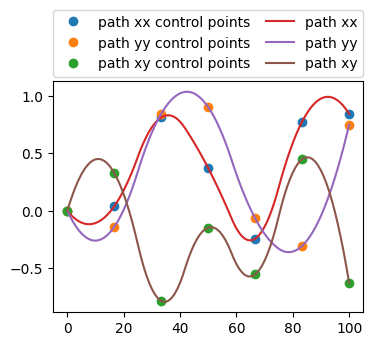

{'samples':    vol_req  control_points                                         loads_path
0      0.3             7.0  [[0.0, -0.028165020700113827, -0.0524237963702..., 'responses':   vol_frac strain stress plastic_energy
0      NaN    NaN    NaN            NaN}


In [3]:
#
loads_path_temp = np.empty([num_points, 1])
loads_path_temp[:] = np.nan
# print(loads_path_temp)
loads_path = pd.DataFrame(loads_path_temp, columns=["loads_path"])
loads_path["loads_path"] = loads_path["loads_path"].astype(object)
# print(loads_path)

# define the path generator
for ii in range(num_points):
    path_generator = PathGenerator(num_control_points=data["samples"].at[ii, "control_points"],num_increment=100)   
    loads_path.iloc[ii, 0] = path_generator.quadratic_interpolate()
    path_generator.plot_path()

# add the loads path to the samples
data["samples"] = pd.concat(
    [data["samples"], loads_path], axis=1, join="inner"
)
print(data)

# yield criterion 1 
- yield function 
$y=0.5+0.2\exp{(\bar\epsilon)}^{0.4}$


In [4]:
simulation_wrapper = PnasRVE()
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    yield_factor_1=0.5,
                                    yield_factor_2=0.2, 
                                    yield_factor_3=0.4,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5316978638492222, 0.541825582103651, 0.5491901897169873, 0.5551891864584486, 0.5603417633654516, 0.5649068444639842, 0.5690349813196016, 0.5728225681210433, 0.5763355781923636, 0.5796214341106994, 0.5827155324558011, 0.585645094733533, 0.5884315702256371, 0.5910922039712734, 0.5936410984009242, 0.5960899547185146, 0.5984486044506366, 0.6007253992982465, 0.6029275027715475, 0.6050611121761507, 0.6071316302061533, 0.6091437994192216, 0.6111018089314695, 0.6130093800197907, 0.6148698354997035, 0.616686156474797, 0.6184610291500892, 0.6201968837498333, 0.6218959271038169, 0.6235601701134824, 0.6251914510450486, 0.6267914553968891, 0.6283617329355872, 0.6299037123771667, 0.6314187140982368, 

In [5]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_1.pickle')


Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s
micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_yield_criteria(nonlinear loads)/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


the simulation time is :40.00912380218506 !
the simulation time is :60.017169713974 !
the simulation time is :80.01722455024719 !
the simulation time is :100.01871085166931 !
the simulation time is :120.01782608032227 !
the simulation time is :140.01724696159363 !
the simulation time is :160.01932644844055 !
the simulation time is :180.01728582382202 !
the simulation time is :200.0173373222351 !
the simulation time is :220.0185191631317 !
the simulation time is :240.01763081550598 !
the simulation time is :260.0177125930786 !
the simulation time is :280.0174357891083 !
the simulation time is :300.0174391269684 !
the simulation time is :320.0175051689148 !
the simulation time is :340.01748991012573 !
the simulation time is :360.01752257347107 !
the simulation time is :380.01785111427307 !
the simulation time is :400.0179805755615 !
the simulation time is :420.0179946422577 !
the simulation time is :440.0187065601349 !
the simulation time is :460.01800179481506 !
Simulation successfully 

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


# yield criterion 2
- yield function 
$y=0.1+0.2\exp{(\bar\epsilon)}^{0.4}$

In [6]:
simulation_wrapper.update_sim_info(mesh_partition=100, 
                                    yield_factor_1=0.1,
                                    yield_factor_2=0.2, 
                                    yield_factor_3=0.4,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.1, 0.13169786384922227, 0.14182558210365093, 0.14919018971698728, 0.1551891864584486, 0.16034176336545164, 0.16490684446398418, 0.16903498131960165, 0.1728225681210432, 0.17633557819236353, 0.17962143411069947, 0.18271553245580105, 0.18564509473353297, 0.1884315702256371, 0.19109220397127336, 0.1936410984009241, 0.1960899547185145, 0.19844860445063667, 0.2007253992982465, 0.20292750277154756, 0.2050611121761507, 0.20713163020615333, 0.20914379941922157, 0.21110180893146946, 0.21300938001979067, 0.2148698354997035, 0.21668615647479691, 0.2184610291500892, 0.22019688374983326, 0.22189592710381686, 0.2235601701134824, 0.22519145104504856, 0.22679145539688908, 0.22836173293558715, 0.229903712377

In [7]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_2.pickle')

remove results succesfully 

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_yield_criteria(nonlinear loads)/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


the simulation time is :40.00770950317383 !
the simulation time is :60.01659607887268 !
the simulation time is :80.01674675941467 !
the simulation time is :100.02049612998962 !
the simulation time is :120.0200514793396 !
the simulation time is :140.01664233207703 !
the simulation time is :160.01676177978516 !
the simulation time is :180.01696634292603 !
the simulation time is :200.00496220588684 !
the simulation time is :220.0169017314911 !
the simulation time is :240.01774048805237 !
the simulation time is :260.0169999599457 !
the simulation time is :280.0210018157959 !
the simulation time is :300.0170304775238 !
the simulation time is :320.0173463821411 !
the simulation time is :340.0170907974243 !
the simulation time is :360.0171184539795 !
the simulation time is :380.0174071788788 !
the simulation time is :400.01715326309204 !
the simulation time is :420.0202832221985 !
the simulation time is :440.01727533340454 !
the simulation time is :460.0173280239105 !
the simulation time is :

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<13 out of 30 licenses remain available>.


# yield criterion 3
- yield function 
$y=1+1\exp{(\bar\epsilon)}^{0.4}$


In [8]:
simulation_wrapper.update_sim_info(mesh_partition=100, 
                                    yield_factor_1=1,
                                    yield_factor_2=1, 
                                    yield_factor_3=0.4,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[1.0, 1.1584893192461114, 1.2091279105182546, 1.2459509485849363, 1.275945932292243, 1.3017088168272581, 1.3245342223199208, 1.3451749065980083, 1.364112840605216, 1.3816778909618175, 1.3981071705534973, 1.413577662279005, 1.4282254736676647, 1.4421578511281856, 1.4554610198563667, 1.4682054920046206, 1.4804497735925723, 1.4922430222531833, 1.5036269964912325, 1.5146375138577377, 1.5253055608807533, 1.5356581510307667, 1.5457189970961078, 1.5555090446573474, 1.5650469000989533, 1.5743491774985174, 1.5834307823739846, 1.592305145750446, 1.6009844187491662, 1.6094796355190844, 1.617800850567412, 1.6259572552252428, 1.6339572769844453, 1.6418086646779355, 1.6495185618858332, 1.6570935704911838, 1.

In [10]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_3.pickle')

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_yield_criteria(nonlinear loads)/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<12 out of 30 licenses remain available>.


the simulation time is :40.009437084198 !
the simulation time is :60.01764130592346 !
the simulation time is :80.01869440078735 !
the simulation time is :100.02016043663025 !
the simulation time is :120.01758408546448 !
the simulation time is :140.01757431030273 !
the simulation time is :160.01782083511353 !
the simulation time is :180.0194809436798 !
the simulation time is :200.0178246498108 !
the simulation time is :220.01791763305664 !
the simulation time is :240.01797652244568 !
the simulation time is :260.0179395675659 !
the simulation time is :280.01772475242615 !
the simulation time is :300.01802825927734 !
the simulation time is :320.01266598701477 !
the simulation time is :340.0181736946106 !
the simulation time is :360.0181562900543 !
the simulation time is :380.02085065841675 !
the simulation time is :400.0182785987854 !
the simulation time is :420.01842164993286 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)


*** ABAQU

Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<13 out of 30 licenses remain available>.


# yield criterion 4
- yield function 
$y=1+10\exp{(\bar\epsilon)}^{0.4}$


In [11]:
simulation_wrapper.update_sim_info(mesh_partition=100, 
                                    yield_factor_1=2,
                                    yield_factor_2=10, 
                                    yield_factor_3=0.4,
                                    print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100.0, 'Pr_matrix': 0.3, 'yield_table_matrix': [[2.0, 3.5848931924611134, 4.091279105182546, 4.459509485849363, 4.75945932292243, 5.017088168272581, 5.245342223199208, 5.451749065980082, 5.641128406052161, 5.816778909618176, 5.981071705534973, 6.135776622790051, 6.282254736676647, 6.421578511281855, 6.554610198563667, 6.682054920046205, 6.804497735925724, 6.922430222531833, 7.036269964912325, 7.146375138577377, 7.253055608807534, 7.356581510307667, 7.457189970961078, 7.555090446573473, 7.650469000989533, 7.743491774985174, 7.834307823739845, 7.923051457504459, 8.009844187491662, 8.094796355190843, 8.178008505674118, 8.259572552252427, 8.339572769844454, 8.418086646779356, 8.495185618858333, 8.570935704911838, 8.64539805948974, 8.718629455476

In [12]:
results = simulation_wrapper.run_simulation(data=data.copy(),save_source_files=False)
simulation_wrapper.save_data('yield_criterion_4.pickle')

remove results succesfully 

micro-structure file already exist

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/pnas_composite/different_yield_criteria(nonlinear loads)/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<13 out of 30 licenses remain available>.


the simulation time is :40.009501218795776 !
the simulation time is :60.01758313179016 !
the simulation time is :80.01769375801086 !
the simulation time is :100.01850271224976 !
the simulation time is :120.01894068717957 !
the simulation time is :140.01759219169617 !
the simulation time is :160.01789832115173 !
the simulation time is :180.0096161365509 !
the simulation time is :200.01789832115173 !
the simulation time is :220.017680644989 !
the simulation time is :240.0177104473114 !
the simulation time is :260.0179853439331 !
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 280.08069896698
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<13 out of 30 licenses remain available>.


# plot all results together 

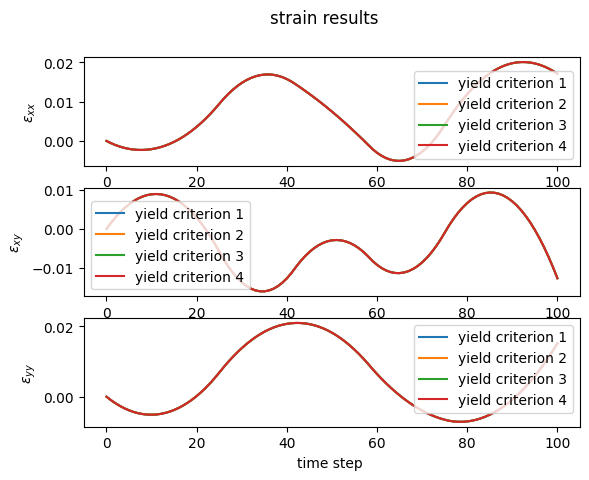

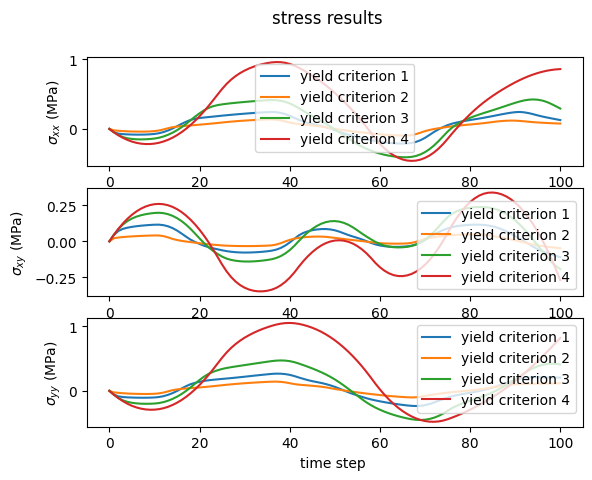

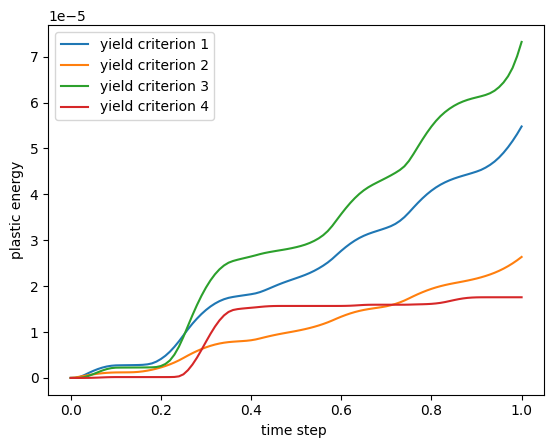

In [13]:
with open("yield_criterion_1.pickle", "rb") as fd:
    yield_criterion_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_2.pickle", "rb") as fd:
    yield_criterion_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_3.pickle", "rb") as fd:
    yield_criterion_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("yield_criterion_4.pickle", "rb") as fd:
    yield_criterion_4 = pickle.load(fd, fix_imports=True, encoding="latin1")

results_1 =yield_criterion_1["responses"]
results_2 =yield_criterion_2["responses"]
results_3 =yield_criterion_3["responses"]
results_4 =yield_criterion_4["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(3,1)
ax[0].plot(strain_1[:, 0, 0], label="yield criterion 1") 
ax[0].plot(strain_2[:, 0, 0], label="yield criterion 2") 
ax[0].plot(strain_3[:, 0, 0], label="yield criterion 3") 
ax[0].plot(strain_4[:, 0, 0], label="yield criterion 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="yield criterion 1")
ax[1].plot(strain_2[:, 0, 1], label="yield criterion 2")
ax[1].plot(strain_3[:, 0, 1], label="yield criterion 3")
ax[1].plot(strain_4[:, 0, 1], label="yield criterion 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="yield criterion 1") 
ax[2].plot(strain_2[:, 1, 1], label="yield criterion 2") 
ax[2].plot(strain_3[:, 1, 1], label="yield criterion 3") 
ax[2].plot(strain_4[:, 1, 1], label="yield criterion 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(3,1)
ax[0].plot(stress_1[:, 0, 0], label="yield criterion 1") 
ax[0].plot(stress_2[:, 0, 0], label="yield criterion 2") 
ax[0].plot(stress_3[:, 0, 0], label="yield criterion 3") 
ax[0].plot(stress_4[:, 0, 0], label="yield criterion 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="yield criterion 1")
ax[1].plot(stress_2[:, 1, 0], label="yield criterion 2")
ax[1].plot(stress_3[:, 1, 0], label="yield criterion 3")
ax[1].plot(stress_4[:, 1, 0], label="yield criterion 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="yield criterion 1") 
ax[2].plot(stress_2[:, 1, 1], label="yield criterion 2") 
ax[2].plot(stress_3[:, 1, 1], label="yield criterion 3") 
ax[2].plot(stress_4[:, 1, 1], label="yield criterion 4") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="yield criterion 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="yield criterion 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="yield criterion 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="yield criterion 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)